In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('F:/Data/Full Stack Data Scientist Bootcamp/ezi tech/archive/spam.csv',encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
596,ham,Gud mrng dear have a nice day,NaN,NaN,NaN
3705,ham,Reading gud habit.. Nan bari hudgi yorge patai...,NaN,NaN,NaN
723,ham,Ya even those cookies have jelly on them,NaN,NaN,NaN
4391,ham,what are your new years plans?,NaN,NaN,NaN
1956,ham,K...k:)why cant you come here and search job:),NaN,NaN,NaN


In [4]:
# the follwing step would be perform during the whole process 
# 1 Cleaning of the dataset 
# 2 EDA
# 3 Text Preprocessing 
# 4. Text Vectorization
# 5.Model Building 
# 6. Evaluation
# 7. Improment
# 8. Website

In [5]:
df.shape

(5572, 5)

### 1. cleaning 

In [6]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [7]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [8]:
df.rename(columns={'v1': 'target', 'v2': 'email'}, inplace=True)

In [9]:
df.sample(5)

,target,email
1864,ham,You call him now ok i said call him
374,spam,"Thanks for your Ringtone Order, Reference T91...."
2068,ham,Its hard to believe things like this. All can ...
2420,ham,Oic... Then better quickly go bathe n settle d...
834,ham,Surely result will offer:)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5572 non-null   object
 1   email   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
# Now performing labeling for the target columnn
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label_target']=label_encoder.fit_transform(df['target'])
df.sample(5)

,target,email,label_target
1885,ham,I think asking for a gym is the excuse for laz...,0
5203,ham,Me fine..absolutly fine,0
4558,ham,Think + da. You wil do.,0
300,ham,"Awesome, I remember the last time we got someb...",0
25,ham,Just forced myself to eat a slice. I'm really ...,0


In [12]:
df.drop('target',axis=1,inplace=True)
# ham=0,spam=1    ---> and the taget column convert into the int formate also 

In [13]:
df.sample(5)

,email,label_target
1578,How to Make a girl Happy? It's not at all diff...,0
2278,Hmm...Bad news...Hype park plaza $700 studio t...,0
1383,Please reserve ticket on saturday eve from che...,0
557,I know that my friend already told that.,0
1496,I'm always on yahoo messenger now. Just send t...,0


In [14]:
df.isna().sum()

email           0
label_target    0
dtype: int64

In [15]:
df[df.duplicated(keep='last')].sort_values(by='email').head(60)

,email,label_target
504,+123 Congratulations - in this week's competit...,1
1372,1) Go to write msg 2) Put on Dictionary mode 3...,0
2162,1) Go to write msg 2) Put on Dictionary mode 3...,0
1049,18 days to Euro2004 kickoff! U will be kept in...,1
388,4mths half price Orange line rental & latest c...,1
1778,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
1469,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
2980,7 wonders in My WORLD 7th You 6th Ur style 5th...,0
2369,A Boy loved a gal. He propsd bt she didnt mind...,0
3747,"A bit of Ur smile is my hppnss, a drop of Ur t...",0


In [16]:
df.drop_duplicates(subset='email', keep='first', inplace=True)

In [17]:
df.shape

(5169, 2)

In [18]:
df.sample(20)

,email,label_target
5320,But we havent got da topic yet rite?,0
4769,CHEERS LOU! YEAH WAS A GOODNITE SHAME U NEVA C...,0
1386,All e best 4 ur exam later.,0
504,+123 Congratulations - in this week's competit...,1
4639,Do you hide anythiing or keeping distance from me,0
4559,I'm awake oh. What's up.,0
4885,Or just do that 6times,0
259,IÛ÷m parked next to a MINI!!!! When are you c...,0
4498,"SMS SERVICES. for your inclusive text credits,...",1
2370,"That day Ì_ say Ì_ cut ur hair at paragon, is ...",0


In [19]:
df.reset_index(inplace=True)

In [20]:
df.drop('index',inplace=True,axis=1)

In [21]:
df

,email,label_target
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5164,This is the 2nd time we have tried 2 contact u...,1
5165,Will Ì_ b going to esplanade fr home?,0
5166,"Pity, * was in mood for that. So...any other s...",0
5167,The guy did some bitching but I acted like i'd...,0


In [22]:
df.columns

Index(['email', 'label_target'], dtype='object')

### 2. EDA

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
value_counts=df['label_target'].value_counts()
value_counts

0    4516
1     653
Name: label_target, dtype: int64

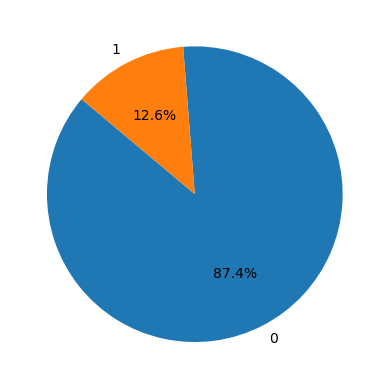

In [25]:
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.show()

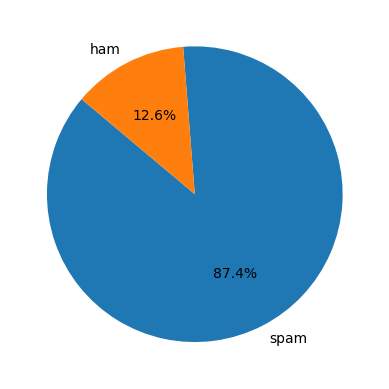

In [26]:
plt.pie(value_counts, labels={'spam':1,'ham':0}, autopct='%1.1f%%', startangle=140)
plt.show()

In [27]:
# ham=0,spam=1

In [28]:
import nltk

nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

[nltk_data] Downloading package punkt to C:\Users\ASIM
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
# Noew creating the more columns
df['num_char']=list(map(lambda i:len(i),df['email'])) 

In [30]:
df['num_words']=list(map(lambda i:len(word_tokenize(i)),df['email']))

In [31]:
df['num_sent']=list(map(lambda i:len(sent_tokenize(i)),df['email']))

In [32]:
df.sample(20)

,email,label_target,num_char,num_words,num_sent
371,Keep my payasam there if rinu brings,0,36,7,1
4027,Yup i'm free...,0,15,5,1
718,Email AlertFrom: Jeri StewartSize: 2KBSubject:...,1,101,16,1
3063,Aight text me when you're back at mu and I'll ...,0,92,23,1
6,Even my brother is not like to speak with me. ...,0,77,18,2
3913,Pls what's the full name of joke's school cos ...,0,124,31,1
4355,Mum not going robinson already.,0,31,6,1
4329,Oh wow thats gay. Will firmware update help,0,43,9,2
2447,Fuck babe ... What happened to you ? How come ...,0,66,15,2
1291,"Aight no rush, I'll ask jay",0,27,8,1


In [33]:
df.describe()

,label_target,num_char,num_words,num_sent
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [34]:
# observation
# 1. max	1.000000	910.000000	220.000000	28.000000 label_target	num_char	num_words	num_sent
df.columns

Index(['email', 'label_target', 'num_char', 'num_words', 'num_sent'], dtype='object')

In [35]:
df[df['label_target']==0].describe()

,label_target,num_char,num_words,num_sent
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,17.120903,1.799601
std,0.0,56.358207,13.493725,1.278465
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,90.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [36]:
df[df['label_target']==1].describe()

,label_target,num_char,num_words,num_sent
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,27.667688,2.967841
std,0.0,30.137753,7.008418,1.483201
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


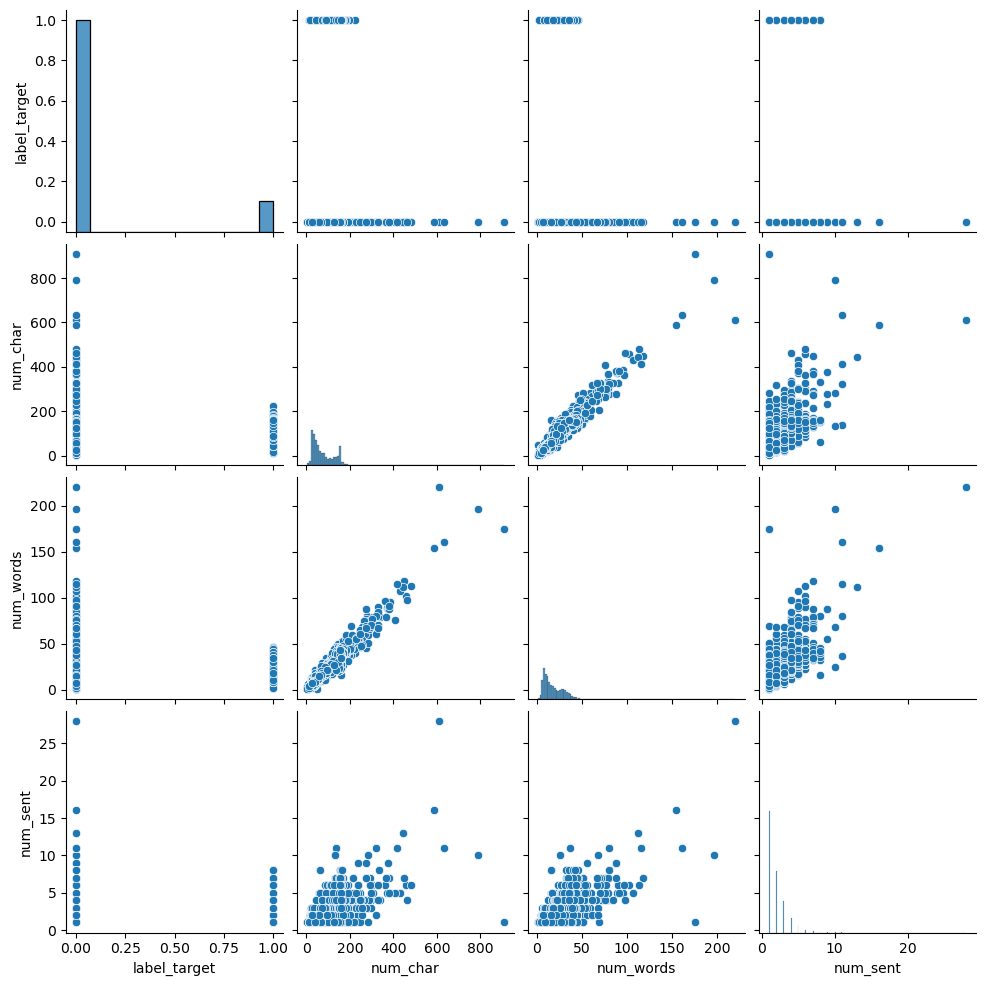

In [37]:
sns.pairplot(df)
plt.show()

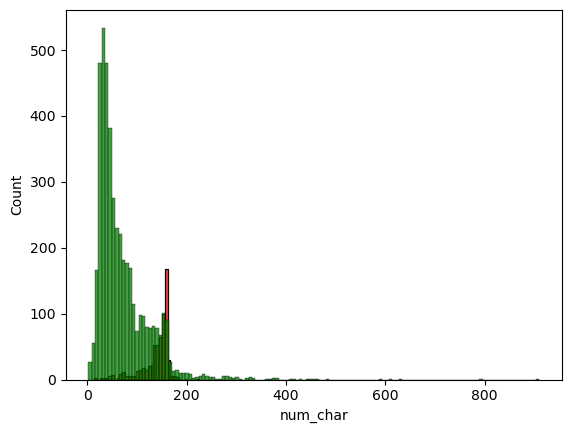

In [38]:
sns.histplot(df[df['label_target']==1]['num_char'],color='red')
sns.histplot(df[df['label_target']==0]['num_char'],color='green')
plt.show()

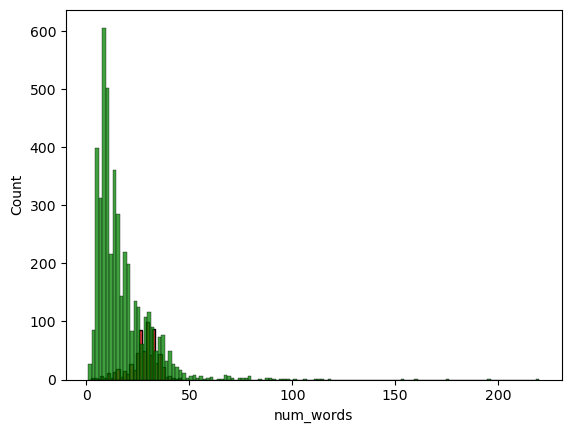

In [39]:
sns.histplot(df[df['label_target']==1]['num_words'],color='red')
sns.histplot(df[df['label_target']==0]['num_words'],color='green')
plt.show()

In [40]:
# From above both graph the spam email made on the large number of character and words as compared to the ham emails 

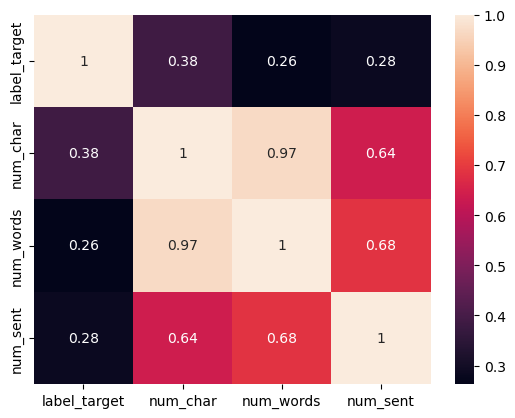

In [41]:
sns.heatmap(df.corr(),annot=True)
plt.show()

### Text Preprocessing or Data preprocessing

In [42]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [43]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to C:\Users\ASIM
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ASIM
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\ASIM
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\ASIM
[nltk_data]     COMPUTERS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [44]:
lemmatizer = WordNetLemmatizer()

In [45]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(lemmatizer.lemmatize(i,wordnet.VERB))
    
            
    return " ".join(y)

In [46]:
transform_text('jiood i am talha is laughing %%% & 7 AAA ALI')

'jiood talha laugh 7 aaa ali'

In [47]:
df['transformed_email'] = df['email'].apply(transform_text)


In [48]:
df.sample(10)

,email,label_target,num_char,num_words,num_sent,transformed_email
1783,Hi. || Do u want | to join me with sts later? ...,0,93,26,4,hi u want join sts later meet five call u class
3450,Wait.i will come out.. &lt;#&gt; min:),0,39,15,1,come lt gt min
4748,"Hi Shanil,Rakhesh here.thanks,i have exchanged...",0,120,22,2,hi shanil rakhesh exchange uncut diamond back ...
4981,Yep get with the program. You're slacking.,0,42,10,2,yep get program slack
5074,I will treasure every moment we spend together...,0,49,9,1,treasure every moment spend together
3588,Can. Dunno wat to get 4 her...,0,30,9,2,dunno wat get 4
4514,....photoshop makes my computer shut down.,0,42,8,1,photoshop make computer shut
2306,I'm meeting Darren...,0,21,5,1,meet darren
995,Don know..wait i will check it.,0,31,9,1,know wait check
1068,Well the weather in cali's great. But its comp...,0,188,44,5,well weather cali great complexities great nee...


In [49]:
# Now make the wordcloud on the base of the top words repeated words int the spame and ham

In [50]:
df.columns

Index(['email', 'label_target', 'num_char', 'num_words', 'num_sent',
       'transformed_email'],
      dtype='object')

In [51]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [52]:
spam_wc = wc.generate(df[df['label_target'] == 1]['transformed_email'].str.cat(sep=" "))

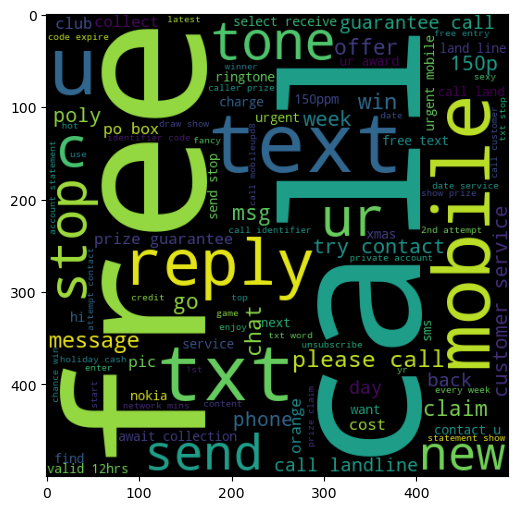

In [53]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

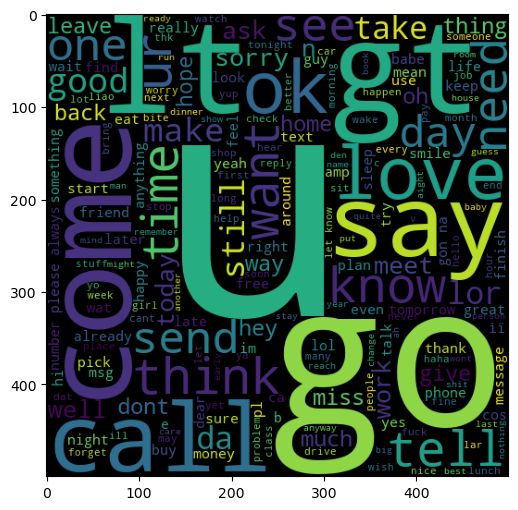

In [54]:
ham_wc = wc.generate(df[df['label_target'] == 0]['transformed_email'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

In [55]:
# Now find the most occuring words on the base of the top words repeated words int the spame and ham

In [56]:
# Initialize the spam_list
from collections import Counter
spam_list = []

# Loop through the transformed_email column where label_target is 1
for email in df[df['label_target'] == 1]['transformed_email']:
    # Split each email into words and add them to the spam_list
    words = email.split()
    spam_list.extend(words)

# Use Counter to count the occurrences of words in the spam_list
word_counter = Counter(spam_list)

# Get the 30 most common words along with their frequencies
most_common_spam_list_30 = word_counter.most_common(30)
most_common_spam_list_30

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 130),
 ('u', 119),
 ('ur', 119),
 ('mobile', 105),
 ('text', 104),
 ('stop', 104),
 ('reply', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 80),
 ('send', 70),
 ('new', 64),
 ('service', 64),
 ('tone', 63),
 ('urgent', 57),
 ('contact', 56),
 ('award', 55),
 ('nokia', 54),
 ('phone', 52),
 ('cash', 51),
 ('please', 51),
 ('win', 49),
 ('c', 45),
 ('message', 42),
 ('guarantee', 42),
 ('per', 41)]

In [57]:
# Initialize the spam_list
from collections import Counter
ham_list = []

# Loop through the transformed_email column where label_target is 1
for email in df[df['label_target'] == 0]['transformed_email']:
    # Split each email into words and add them to the spam_list
    words = email.split()
    ham_list.extend(words)

# Use Counter to count the occurrences of words in the spam_list
word_counter = Counter(ham_list)

# Get the 30 most common words along with their frequencies
most_common_ham_list_30 = word_counter.most_common(30)
most_common_ham_list_30

[('u', 883),
 ('get', 588),
 ('go', 495),
 ('come', 298),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('know', 247),
 ('call', 233),
 ('like', 231),
 ('time', 219),
 ('ok', 217),
 ('good', 212),
 ('want', 208),
 ('love', 204),
 ('say', 203),
 ('ur', 197),
 ('think', 193),
 ('tell', 184),
 ('send', 171),
 ('need', 170),
 ('day', 166),
 ('take', 164),
 ('see', 160),
 ('lor', 159),
 ('one', 158),
 ('4', 156),
 ('make', 153),
 ('home', 152),
 ('still', 143)]

In [58]:
spam_list

['free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receive',
 'entry',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'apply',
 '08452810075over18',
 'freemsg',
 'hey',
 'darling',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chgs',
 'send',
 'rcv',
 'winner',
 'value',
 'network',
 'customer',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hours',
 'mobile',
 '11',
 'months',
 'u',
 'r',
 'entitle',
 'update',
 'latest',
 'colour',
 'mobiles',
 'camera',
 'free',
 'call',
 'mobile',
 'update',
 'co',
 'free',
 '08002986030',
 'six',
 'chance',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6days',
 'tsandcs',
 'apply',
 'reply',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',

In [59]:
ham_list

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'get',
 'amore',
 'wat',
 'ok',
 'lar',
 'joke',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'think',
 'go',
 'usf',
 'live',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aid',
 'patent',
 'per',
 'request',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'callers',
 'press',
 '9',
 'copy',
 'friends',
 'callertune',
 'gon',
 'na',
 'home',
 'soon',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'cry',
 'enough',
 'today',
 'search',
 'right',
 'word',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'grant',
 'fulfil',
 'promise',
 'wonderful',
 'bless',
 'time',
 'date',
 'sunday',
 'oh',
 'k',
 'watch',
 'eh',
 'u',
 'remember',
 '2',
 'spell',
 'name',
 'yes',
 'v',
 'naughty',
 'make',
 'v',
 'wet',
 'fi

###  Building Multiples Models

In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [61]:
X = cv.fit_transform(df['transformed_email']).toarray()
print(X)
print(X.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(5169, 7055)


In [62]:
X = tfidf.fit_transform(df['transformed_email']).toarray()
print(X)
print(X.shape)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(5169, 3000)


In [63]:
y = df['label_target']

In [64]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
X_train,X_test,y_train,y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 3963    0
 2905    0
 3165    0
 3271    0
 2533    0
        ..
 3335    0
 1099    0
 2514    0
 3606    0
 2575    0
 Name: label_target, Length: 4135, dtype: int32,
 2360    0
 4365    0
 4500    0
 3916    0
 4714    1
        ..
 2830    0
 2312    0
 4382    0
 5001    0
 1933    0
 Name: label_target, Length: 1034, dtype: int32)

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [67]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [68]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [69]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'GNB': gnb,
    'MNB': mnb,
    'BNB': bnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [70]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [71]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865


C:\Users\ASIM COMPUTERS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  GNB
Accuracy -  0.8646034816247582
Precision -  0.4956140350877193
For  MNB
Accuracy -  0.971953578336557
Precision -  1.0
For  BNB
Accuracy -  0.9835589941972921
Precision -  0.991869918699187
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8541666666666666
For  LR
Accuracy -  0.9535783365570599
Precision -  0.9591836734693877
For  RF
Accuracy -  0.971953578336557
Precision -  0.9739130434782609
For  AdaBoost
Accuracy -  0.9593810444874274
Precision -  0.9444444444444444
For  BgC
Accuracy -  0.9564796905222437
Precision -  0.8604651162790697
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9833333333333333
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9479166666666666
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9568965517241379


In [72]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
3,MNB,0.971954,1.000000
4,BNB,0.983559,0.991870
10,ETC,0.978723,0.983333
0,SVC,0.975822,0.974790
7,RF,0.971954,0.973913
6,LR,0.953578,0.959184
12,xgb,0.969052,0.956897
11,GBDT,0.949710,0.947917
8,AdaBoost,0.959381,0.944444


In [73]:
# By seeing the above Now combining the different model through the different technique like 
# voting or stacking 

In [74]:
svc2 = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb2 = MultinomialNB()
bnb2 = BernoulliNB()
etc2 = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [75]:
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('svm', svc2), ('nb', mnb2), ('et', etc2),('bnb', bnb2)],voting='soft')
voting.fit(X_train,y_train)
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 1.0


In [81]:
from sklearn.ensemble import StackingClassifier

estimators=[('svm', svc2), ('nb', mnb2), ('et', etc2),('bnb', bnb2)]
final_estimator=RandomForestClassifier()

stack = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
stack.fit(X_train,y_train)
y_pred = stack.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9835589941972921
Precision 0.9689922480620154


#### Now Pickling the all text_to_vector 

In [80]:
import pickle
pickle.dump(tfidf,open('email_spam_vectorizer.pkl','wb'))

#### Now Pickling the all text_to_vector

In [84]:
pickle.dump(svc, open('svc_email_spam_model.pkl', 'wb'))

pickle.dump(knc, open('knc_email_spam_model.pkl', 'wb'))

pickle.dump(gnb, open('gnb_email_spam_model.pkl', 'wb'))

pickle.dump(mnb, open('mnb_email_spam_model.pkl', 'wb'))

pickle.dump(bnb, open('bnb_email_spam_model.pkl', 'wb'))

pickle.dump(dtc, open('dtc_email_spam_model.pkl', 'wb'))

pickle.dump(lrc, open('lrc_email_spam_model.pkl', 'wb'))

pickle.dump(rfc, open('rfc_email_spam_model.pkl', 'wb'))

pickle.dump(abc, open('abc_email_spam_model.pkl', 'wb'))

pickle.dump(bc, open('bc_email_spam_model.pkl', 'wb'))

pickle.dump(etc, open('etc_email_spam_model.pkl', 'wb'))

pickle.dump(gbdt, open('gbdt_email_spam_model.pkl', 'wb'))

pickle.dump(xgb, open('xgb_email_spam_model.pkl', 'wb'))

In [85]:
pickle.dump(voting, open('voting_email_spam_model.pkl', 'wb'))

pickle.dump(stack, open('stacking_email_spam_model.pkl', 'wb'))